In [1]:
!pip install darts >> None

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from darts import TimeSeries
# import torch
# device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [49]:
df = pd.read_csv('with_all_metrics.csv')

In [50]:
df

,clock,Free swap space in %,CPU $2 time 0,CPU $2 time 1,CPU $2 time 2,CPU $2 time 3,Processor load (1 min average per core) 4,CPU $2 time 5,CPU $2 time 6,CPU $2 time 7,...,CPU $2 time 32,CPU $2 time 33,CPU $2 time 34,CPU $2 time 35,CPU $2 time 36,CPU $2 time 37,CPU $2 time 38,CPU $2 time 39,CPU $2 time 40,CPU $2 time 41
0,2022-01-16 06:00:00,96.3379,0.0411,0.0000,0.0100,0.0,0.0089,0.8134,98.4299,0.0,...,98.4393,0.0,74.4140,0.0,0.1114,0.0000,0.2510,0.0,1.3779,23.7792
1,2022-01-16 07:00:00,96.2813,0.0426,0.0000,0.0099,0.0,0.0103,0.8177,98.4380,0.0,...,98.4019,0.0,72.5040,0.0,0.1582,0.0000,0.2519,0.0,1.3963,25.6388
2,2022-01-16 08:00:00,96.2584,0.0415,0.0000,0.0097,0.0,0.0111,0.8162,98.4217,0.0,...,98.4321,0.0,73.9472,0.0,0.0673,0.0000,0.3745,0.0,1.6176,24.0255
3,2022-01-16 09:00:00,96.1931,0.0409,0.0000,0.0097,0.0,0.0100,0.8139,98.4058,0.0,...,98.4255,0.0,75.3787,0.0,0.0784,0.0000,0.2790,0.0,1.4688,22.8447
4,2022-01-16 10:00:00,96.2134,0.0412,0.0000,0.0102,0.0,0.0127,0.7979,98.4680,0.0,...,98.4473,0.0,76.5770,0.0,0.0748,0.0000,0.2285,0.0,1.3397,21.8230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,2022-05-21 21:00:00,99.8364,0.0409,0.0000,0.0091,0.0,0.3439,0.5966,71.6404,0.0,...,98.7852,0.0,98.9368,0.0,0.2868,0.0000,0.0034,0.0,0.5525,0.2207
3016,2022-05-21 22:00:00,99.8364,0.0434,0.0000,0.0104,0.0,0.3873,0.5904,64.3791,0.0,...,98.6478,0.0,99.0284,0.0,0.2201,0.0000,0.0030,0.0,0.5421,0.2190
3017,2022-05-21 23:00:00,99.8364,0.0429,0.0000,0.0095,0.0,0.3435,0.5966,66.1131,0.0,...,98.7265,0.0,99.2228,0.0,0.0767,0.0000,0.0028,0.0,0.4893,0.1920
3018,2022-05-22 00:00:00,99.8364,0.0436,0.0025,0.0097,0.0,0.2439,0.5905,72.9526,0.0,...,98.7272,0.0,99.2493,0.0,0.0587,0.0023,0.0027,0.0,0.4905,0.1966


Number of components is larger than 10 (43). Plotting only the first 10 components.


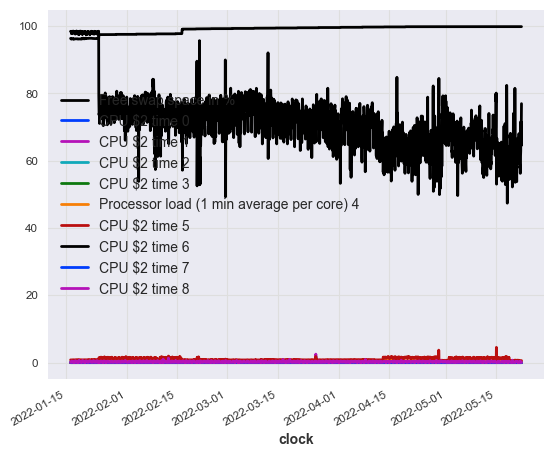

In [51]:
series = pd.read_csv('with_all_metrics.csv')
# series.drop('Unnamed: 0', axis=1, inplace=True)
series['clock'] = pd.to_datetime(series.clock)
series.set_index('clock', inplace=True)

series = TimeSeries.from_dataframe(series, fill_missing_dates=True)
series.plot()

In [52]:
df.columns

Index(['clock', 'Free swap space in %', 'CPU $2 time 0', 'CPU $2 time 1',
       'CPU $2 time 2', 'CPU $2 time 3',
       'Processor load (1 min average per core) 4', 'CPU $2 time 5',
       'CPU $2 time 6', 'CPU $2 time 7', 'CPU $2 time 8', 'CPU $2 time 9',
       'CPU $2 time 10', 'CPU $2 time 11', 'CPU $2 time 12', 'CPU $2 time 13',
       'CPU $2 time 14', 'Free swap space in % 15',
       'Free inodes on $1 (percentage) 16',
       'Free inodes on $1 (percentage) 17',
       'Free inodes on $1 (percentage) 18',
       'Free disk space on $1 (percentage) 19',
       'Free disk space on $1 (percentage) 20',
       'Free disk space on $1 (percentage) 21',
       'Free inodes on $1 (percentage) 22',
       'Free inodes on $1 (percentage) 23',
       'Free inodes on $1 (percentage) 24',
       'Free disk space on $1 (percentage) 25',
       'Free disk space on $1 (percentage) 26',
       'Free disk space on $1 (percentage) 27',
       'Free disk space on $1 (percentage) 28',
       'Fr

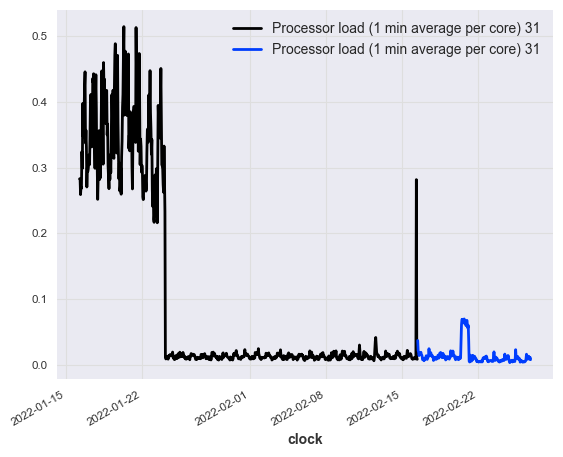

In [73]:
met = series['Processor load (1 min average per core) 31'][:1000]
train, val = met.split_before(0.75)
train.plot()
val.plot()

In [75]:
from darts.models import RegressionModel
from sklearn.linear_model import BayesianRidge

model = RegressionModel(lags=72, model=BayesianRidge())

model.fit(series.split_before(0.75)[0])
pred = model.predict(series=series, n=36)
plt.figure(figsize=(10, 6))
for rofl in pred:
    rofl.plot()

ValueError: Input X contains NaN.
BayesianRidge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

  0%|          | 0/399 [00:00<?, ?it/s]

MAPE = 92.31


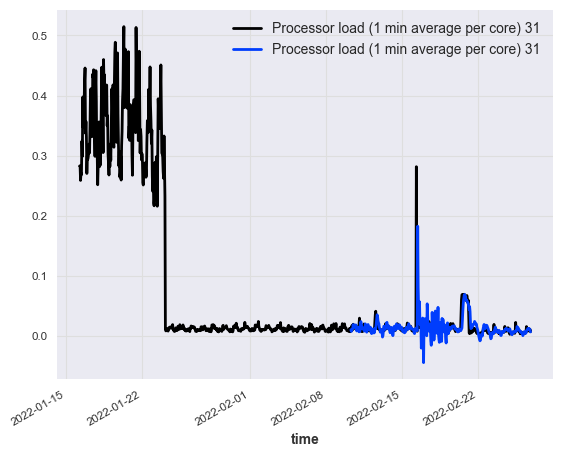

In [77]:
from darts.metrics import mape
bayes_ridge_model = RegressionModel(
    lags=72, model=BayesianRidge()
)

backtest = bayes_ridge_model.historical_forecasts(
    met, start=0.6, forecast_horizon=3, verbose=True
)

print("MAPE = %.2f" % (mape(backtest, met)))
met.plot()
backtest.plot()
